<a href="https://colab.research.google.com/github/Elakkiya1802/ML-tasks/blob/main/Task7(image_classification_using_cnn_mobilenet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 154ms/step - accuracy: 0.3882 - loss: 1.6793 - val_accuracy: 0.6111 - val_loss: 1.1076
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 153ms/step - accuracy: 0.6328 - loss: 1.0529 - val_accuracy: 0.6629 - val_loss: 0.9734
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 150ms/step - accuracy: 0.6977 - loss: 0.8670 - val_accuracy: 0.7024 - val_loss: 0.8447
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.7403 - loss: 0.7447 - val_accuracy: 0.7077 - val_loss: 0.8534
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 146ms/step - accuracy: 0.7697 - loss: 0.6609 - val_accuracy: 0.7305 - val_loss: 0.7832
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.8000 - loss: 0.5741 - val_accuracy: 0.7519 - val_loss: 0.7373
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.8275 - loss: 0.4987 - val_accuracy: 0.7508 - val_loss: 0.7438
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 146ms/step - accuracy: 0.8501 -

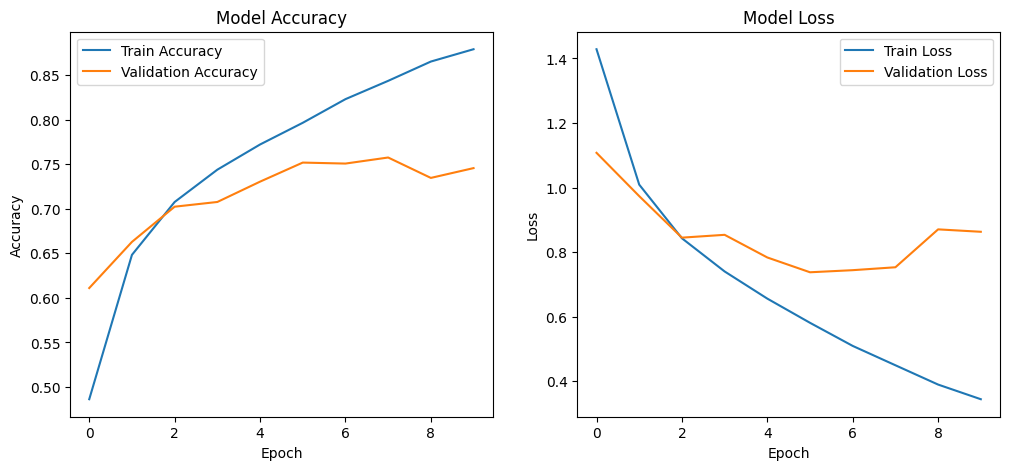

In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt  # For visualization

# Step 2: Prepare Dataset (Use CIFAR-10 as example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 3: Create a Simple CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model (Save history for plotting)
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Step 7: Make Predictions (Optional)
predictions = model.predict(x_test[:5])
for i, pred in enumerate(predictions):
    print(f"Image {i+1} -> Predicted Class: {pred.argmax()}")

# -------------------------------
# Step 8: Plot Training & Validation Accuracy and Loss
# -------------------------------
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
